# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: YYYY/0X
##### Professor: Hilmer Neri

##### Members:

- Member x
- Member y

### LIBRARIES

In [31]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Deal with time
import datetime

### GRAPH SETTINGS

In [32]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [33]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

##### Path to the folder with all your jsons

In [34]:
jsons = glob('analytics-raw-data/*.json') # add the path here
print(jsons)

['analytics-raw-data/fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29-2021-15-07.json', 'analytics-raw-data/fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-2021-23-52.json', 'analytics-raw-data/fga-eps-mds-2021.1-Pro-Especies-UserInterface-10-21-2021-17-56.json', 'analytics-raw-data/fga-eps-mds-2021.1-Pro-Especies-User-10-29-2021-14-47.json']


In [35]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"Pro-Especies-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [36]:
base_component_df = create_base_component_df(jsons)
base_component_df

,metric,value,bestValue,filename,repository,version
12,duplicated_lines_density,0.0,True,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
13,functions,19,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
14,test_execution_time,114,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
15,security_rating,1.0,True,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
16,tests,24,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
17,files,8,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
18,complexity,43,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
19,ncloc,382,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
20,coverage,85.2,False,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
21,reliability_rating,1.0,True,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52


In [37]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
12,duplicated_lines_density,0.0,True,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
13,functions,19,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
14,test_execution_time,114,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
15,security_rating,1.0,True,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
16,tests,24,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
17,files,8,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
18,complexity,43,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
19,ncloc,382,NaN,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
20,coverage,85.2,False,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
21,reliability_rating,1.0,True,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52


#### Create dataframe per file

In [38]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [70]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'ts')

        file_component_df['filename'] = os.path.basename(i)
        print(file_component_df['filename'])
        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
#     print(df['filename'])
    aux_df = df['filename'].str.split(r"Pro-Especies-(.*?)-(.*?).json", expand=True)
#     print(aux_df)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [71]:
file_component_df = create_file_df(jsons)

0    fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29...
1    fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29...
2    fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29...
3    fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29...
4    fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29...
5    fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29...
6    fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29...
7    fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29...
Name: filename, dtype: object
0    fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...
1    fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...
2    fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...
3    fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...
4    fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...
5    fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...
6    fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...
7    fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...
Name: filename, dtype: object
0     fga-eps-mds-2021.1-Pro-Especies-UserInterface-...
1   

In [72]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
8,src/app.ts,0,0,0.0,0.0,NaN,11,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
9,src/middleware/auth.ts,3,5,0.0,0.0,38.9,31,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
10,src/config/database.ts,2,4,0.0,0.0,NaN,27,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
11,src/models/fishLog.ts,0,0,0.0,0.0,100.0,89,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
12,src/controllers/fishLogController.ts,7,26,0.0,0.0,91.5,189,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
13,src/routes/fishLogRoutes.ts,6,6,0.0,0.0,0.0,25,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
14,src/routes/router.ts,0,0,16.7,0.0,NaN,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
15,src/server.ts,1,2,0.0,0.0,NaN,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-FishLog-10-28-...,FishLog,10-28-2021-23-52
0,src/app.ts,0,0,0.0,0.0,NaN,10,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29...,FishWiki,10-29-2021-15-07
1,src/config/database.ts,2,4,0.0,0.0,NaN,29,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-FishWiki-10-29...,FishWiki,10-29-2021-15-07


#### Create dataframe per repository

In [102]:
# Example
print(file_component_df['repository'])
repo1_df = file_component_df[file_component_df['repository'] == 'UserInterface']
repo2_df = file_component_df[file_component_df['repository'] == 'User']
repo3_df = file_component_df[file_component_df['repository'] == 'FishWiki']
repo4_df = file_component_df[file_component_df['repository'] == 'FishLog']
repo1_df


8           FishLog
9           FishLog
10          FishLog
11          FishLog
12          FishLog
13          FishLog
14          FishLog
15          FishLog
0          FishWiki
1          FishWiki
2          FishWiki
3          FishWiki
4          FishWiki
5          FishWiki
6          FishWiki
7          FishWiki
89             User
90             User
91             User
92             User
93             User
94             User
95             User
96             User
16    UserInterface
17    UserInterface
18    UserInterface
19    UserInterface
20    UserInterface
21    UserInterface
22    UserInterface
23    UserInterface
24    UserInterface
25    UserInterface
26    UserInterface
27    UserInterface
28    UserInterface
29    UserInterface
30    UserInterface
31    UserInterface
32    UserInterface
33    UserInterface
34    UserInterface
35    UserInterface
36    UserInterface
37    UserInterface
38    UserInterface
39    UserInterface
40    UserInterface
41    UserInterface


,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
16,src/contexts/authContext.tsx,7,9,0.0,0.0,0.0,73,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-UserInterface-...,UserInterface,10-21-2021-17-56
17,src/services/fishLogService/createFishLog.ts,1,6,0.0,0.0,0.0,40,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-UserInterface-...,UserInterface,10-21-2021-17-56
18,src/services/userServices/createUser.ts,1,1,0.0,0.0,0.0,23,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-UserInterface-...,UserInterface,10-21-2021-17-56
19,src/services/fishLogService/deleteFishLog.ts,1,1,0.0,0.0,0.0,10,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-UserInterface-...,UserInterface,10-21-2021-17-56
20,src/services/fishLogService/fishService.ts,0,0,0.0,0.0,0.0,6,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-UserInterface-...,UserInterface,10-21-2021-17-56
21,src/services/fishLogService/getAllLogs.ts,1,1,0.0,0.0,0.0,9,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-UserInterface-...,UserInterface,10-21-2021-17-56
22,src/services/fishLogService/getOneFishLog.ts,1,1,0.0,0.0,0.0,9,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-UserInterface-...,UserInterface,10-21-2021-17-56
23,src/services/wikiServices/getOneWikiFish.ts,1,1,0.0,0.0,0.0,6,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-UserInterface-...,UserInterface,10-21-2021-17-56
24,src/services/wikiServices/getWikiFishes.ts,1,2,0.0,0.0,0.0,9,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-UserInterface-...,UserInterface,10-21-2021-17-56
25,src/components/Wiki/index.tsx,6,16,0.0,0.0,0.0,130,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021.1-Pro-Especies-UserInterface-...,UserInterface,10-21-2021-17-56


In [103]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        n = 0
        # try to cast the current ncloc value to int, if the value is NaN/Null, consider it as zero.
        try:
            n = int(each)
        except ValueError:
            n = 0
        ncloc += n

    return ncloc

### Measure calculations according Q-Rapids quality model

# Quality Aspect - Maintainability
## Factor - Code Quality

##### COMPLEXITY

In [104]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [105]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [106]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

# Quality Aspect - Reliability
## Factor - Testing Status

##### Passed tests

In [107]:
def m4(df):

    passed_tests = df['test_success_density'].astype(float).median() / 100

    return passed_tests

##### Fast test builds

In [108]:
def m5(df):

    density_fast_test_builds = len(df[(df['test_execution_time'].astype(float)) < 300]) / sum(df['tests'].astype(float))

    return density_fast_test_builds

##### Test coverage

In [109]:
def m6(df):

    density_test_coverage = len(df[(df['coverage'].astype(float) > 60)]) / len(df)

    return density_test_coverage

### Calculate m1, m2, m3, m4, m5 and m6 for each repository

In [110]:
def create_metrics_df(df):
    print(df['version'])
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    print(version_vec)
    for version in version_vec:
        print(version)

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m3(version_df))
        m5_list.append(m3(version_df))
        m6_list.append(m3(version_df))

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'm4': m3_list,
                               'm5': m3_list,
                               'm6': m3_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list})
        
    return metrics_df

In [111]:
repo1_metrics = create_metrics_df(repo1_df)
repo2_metrics = create_metrics_df(repo2_df)
repo3_metrics = create_metrics_df(repo3_df)
repo4_metrics = create_metrics_df(repo4_df)
repo1_metrics


16    10-21-2021-17-56
17    10-21-2021-17-56
18    10-21-2021-17-56
19    10-21-2021-17-56
20    10-21-2021-17-56
21    10-21-2021-17-56
22    10-21-2021-17-56
23    10-21-2021-17-56
24    10-21-2021-17-56
25    10-21-2021-17-56
26    10-21-2021-17-56
27    10-21-2021-17-56
28    10-21-2021-17-56
29    10-21-2021-17-56
30    10-21-2021-17-56
31    10-21-2021-17-56
32    10-21-2021-17-56
33    10-21-2021-17-56
34    10-21-2021-17-56
35    10-21-2021-17-56
36    10-21-2021-17-56
37    10-21-2021-17-56
38    10-21-2021-17-56
39    10-21-2021-17-56
40    10-21-2021-17-56
41    10-21-2021-17-56
42    10-21-2021-17-56
43    10-21-2021-17-56
44    10-21-2021-17-56
45    10-21-2021-17-56
46    10-21-2021-17-56
47    10-21-2021-17-56
48    10-21-2021-17-56
49    10-21-2021-17-56
50    10-21-2021-17-56
51    10-21-2021-17-56
52    10-21-2021-17-56
53    10-21-2021-17-56
54    10-21-2021-17-56
55    10-21-2021-17-56
56    10-21-2021-17-56
57    10-21-2021-17-56
58    10-21-2021-17-56
59    10-21

,m1,m2,m3,m4,m5,m6,repository,version,ncloc
0,0.863014,0.027397,0.958904,0.958904,0.958904,0.958904,UserInterface,10-21-2021-17-56,3796


### Data visualization

- You must do this for each of your repositories

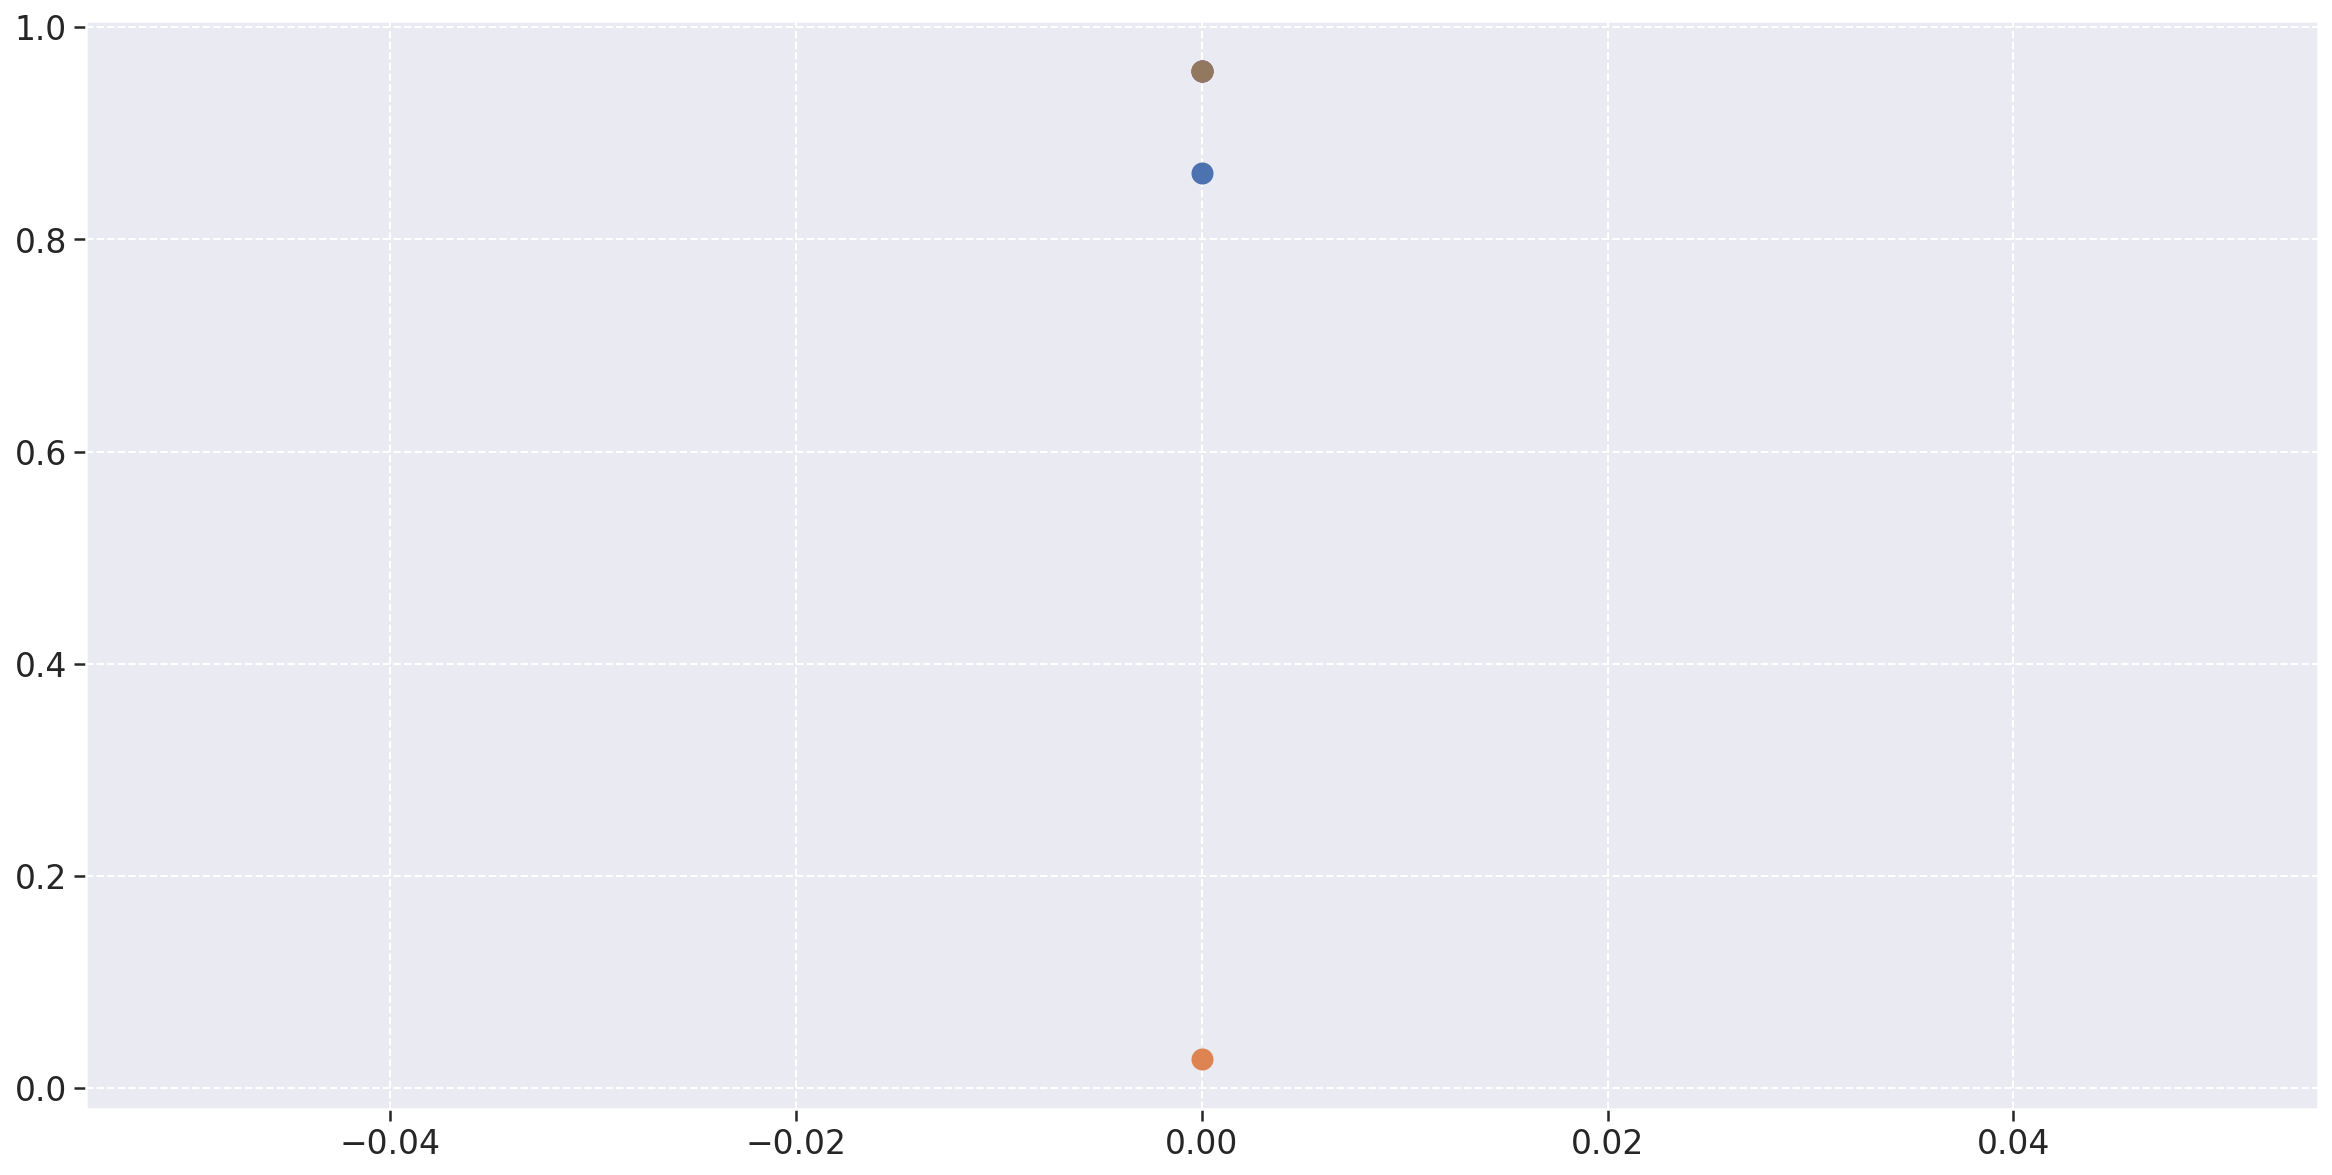

In [113]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo1_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m6'], linewidth=3, marker='o', markersize=10)

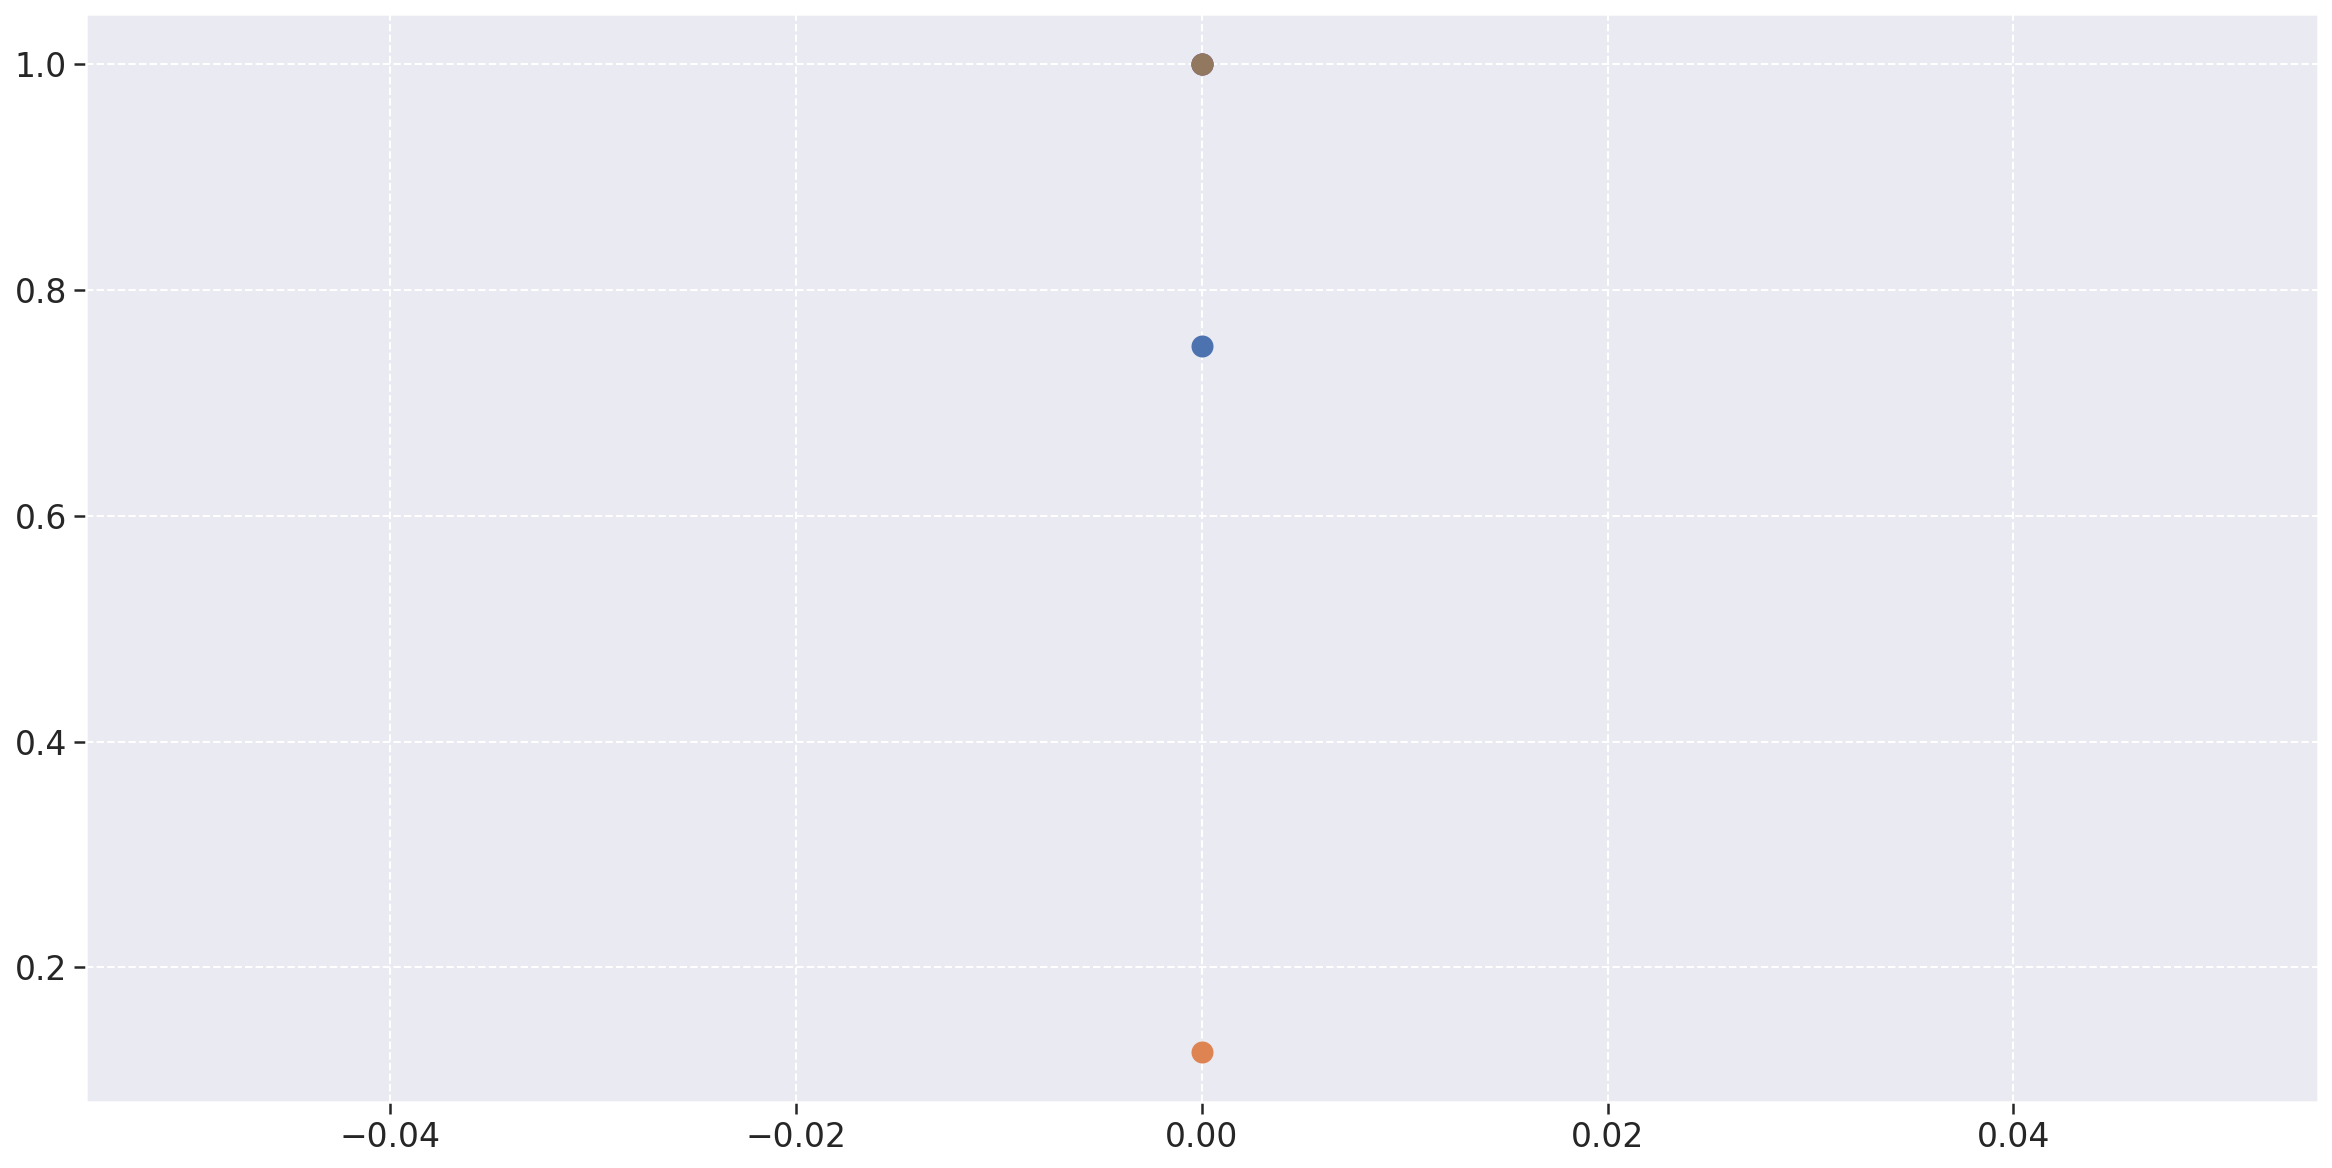

In [115]:
fig = plt.figure(figsize=(20, 10))


plt.plot(repo2_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2_metrics['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2_metrics['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2_metrics['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2_metrics['m6'], linewidth=3, marker='o', markersize=10)

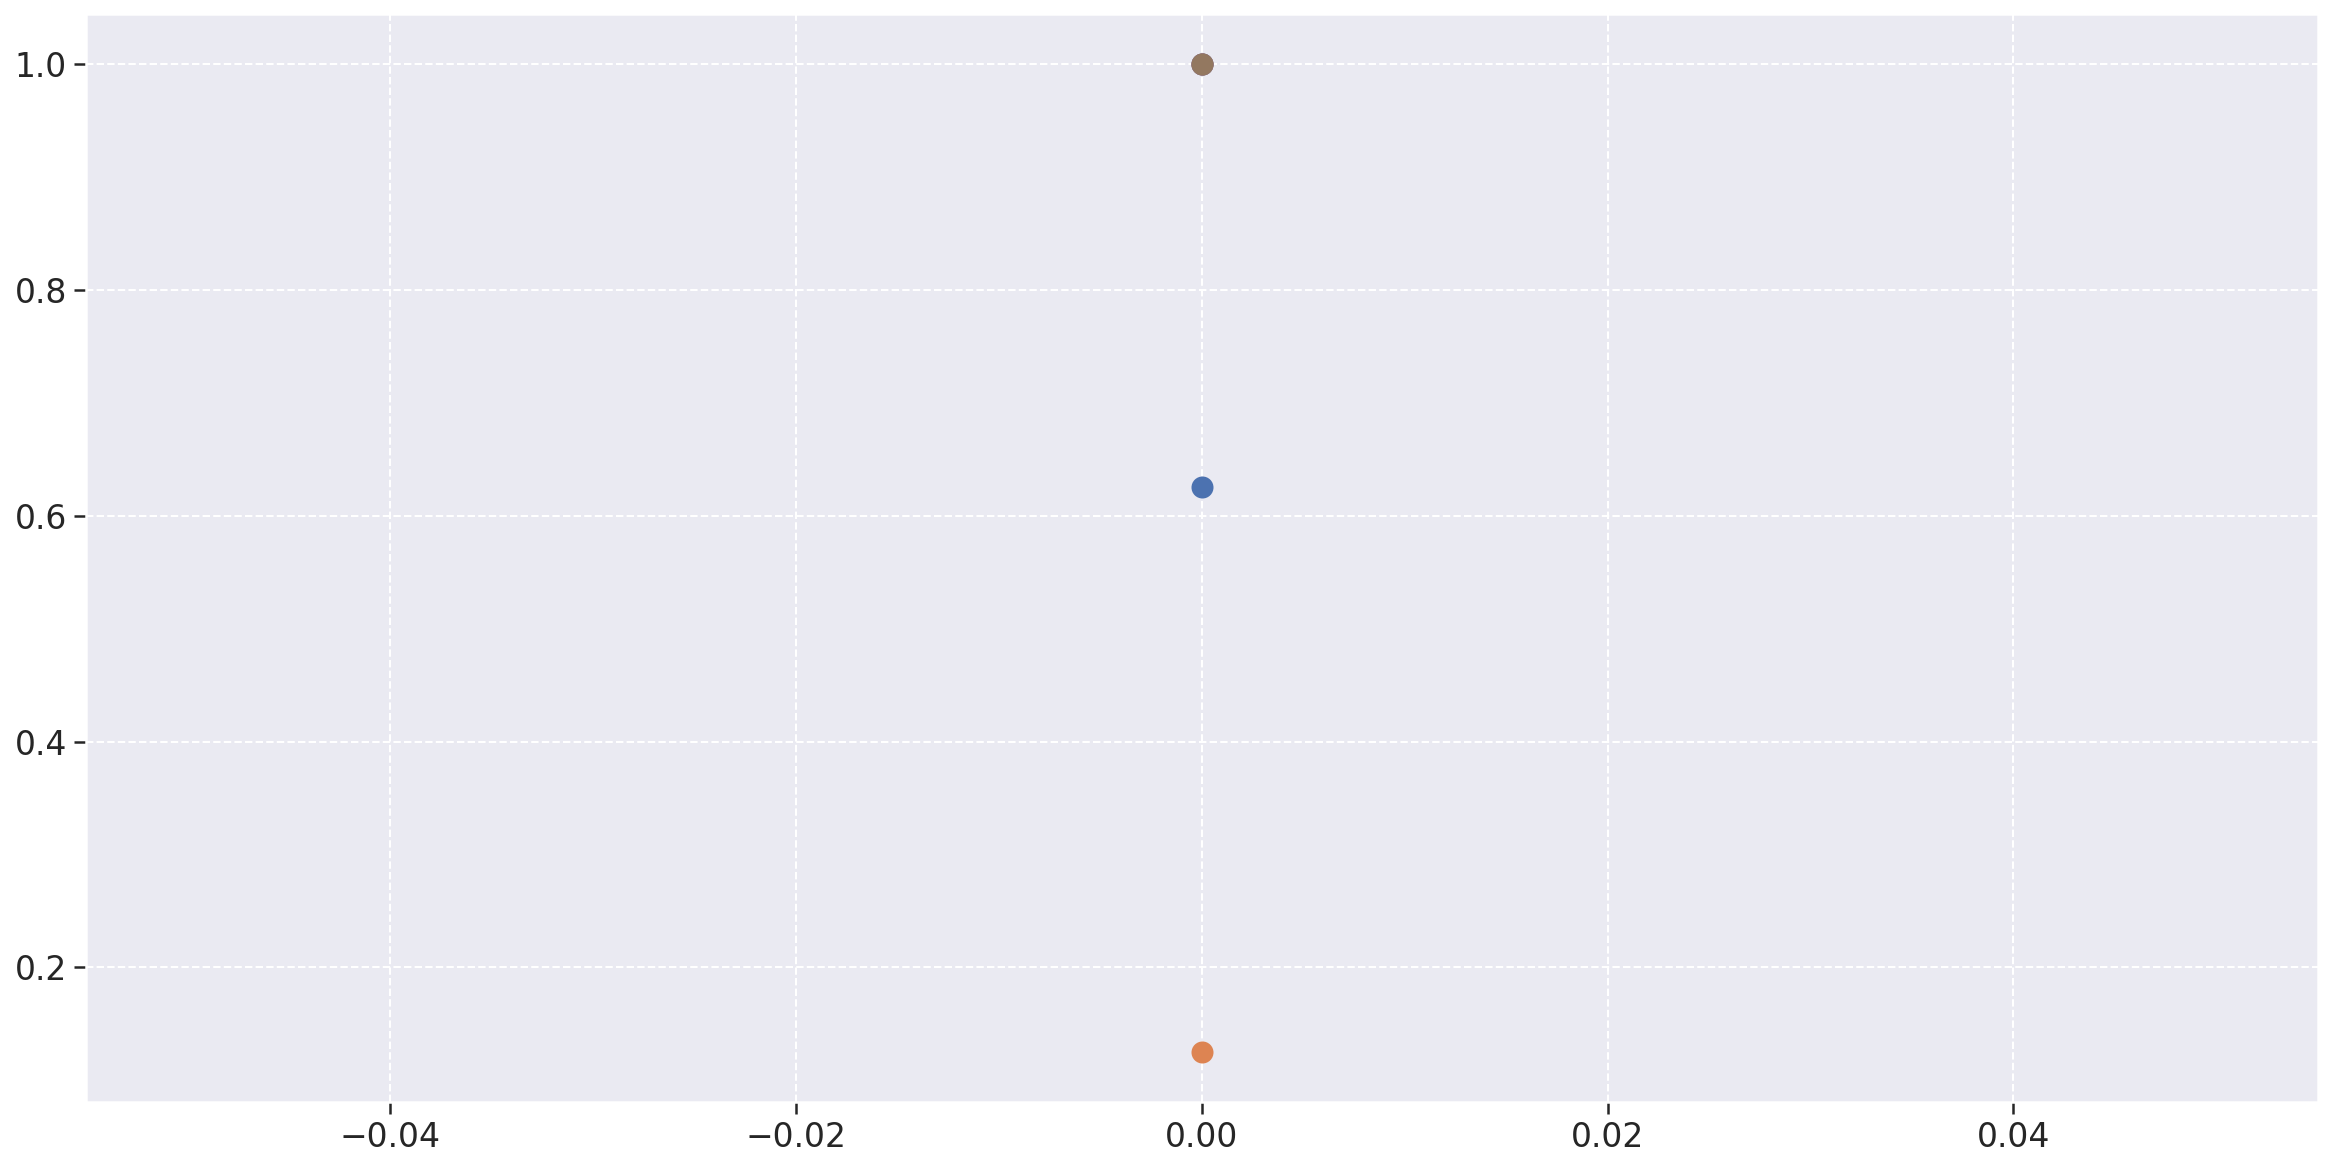

In [116]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo3_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3_metrics['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3_metrics['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3_metrics['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3_metrics['m6'], linewidth=3, marker='o', markersize=10)

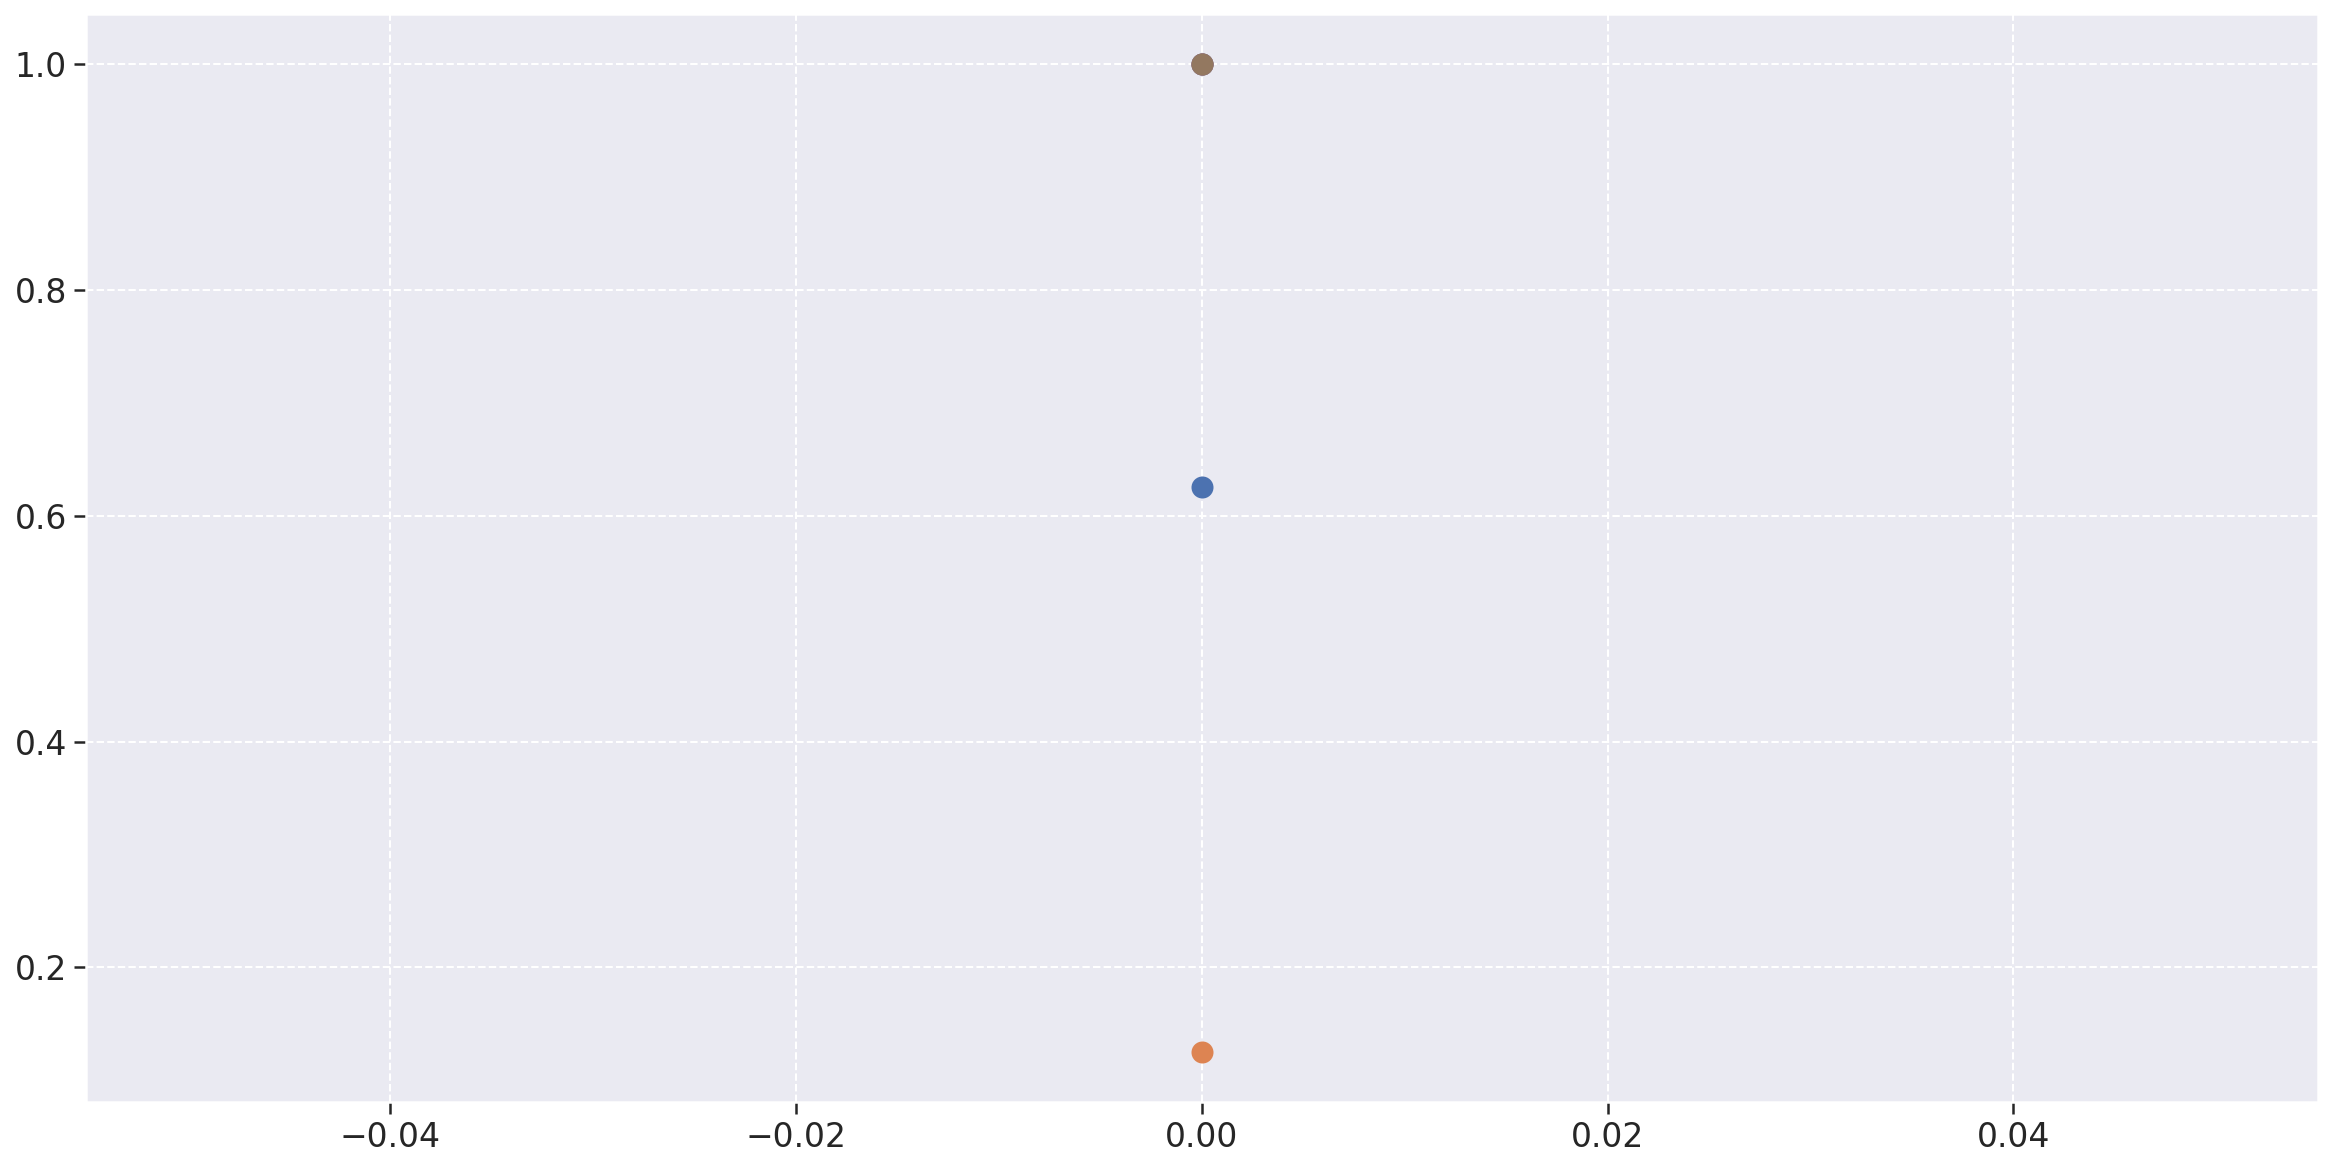

In [117]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo4_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo4_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo4_metrics['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo4_metrics['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo4_metrics['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo4_metrics['m6'], linewidth=3, marker='o', markersize=10)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [125]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33
pm4 = 0.15
pm5 = 0.15
pm6 = 0.7

repo1_metrics['code_quality'] = ((repo1_metrics['m1']*pm1) + (repo1_metrics['m2']*pm2) + (repo1_metrics['m3']*pm3)) * psc1
repo2_metrics['code_quality'] = ((repo2_metrics['m1']*pm1) + (repo2_metrics['m2']*pm2) + (repo2_metrics['m3']*pm3)) * psc1
repo3_metrics['code_quality'] = ((repo3_metrics['m1']*pm1) + (repo3_metrics['m2']*pm2) + (repo3_metrics['m3']*pm3)) * psc1
repo4_metrics['code_quality'] = ((repo4_metrics['m1']*pm1) + (repo4_metrics['m2']*pm2) + (repo4_metrics['m3']*pm3)) * psc1

repo1_metrics['testing_status'] = ((repo1_metrics['m4']*pm4) + (repo1_metrics['m5']*pm5) + (repo1_metrics['m6']*pm6)) * psc2
repo2_metrics['testing_status'] = ((repo2_metrics['m4']*pm4) + (repo2_metrics['m5']*pm5) + (repo2_metrics['m6']*pm6)) * psc2
repo3_metrics['testing_status'] = ((repo3_metrics['m4']*pm4) + (repo3_metrics['m5']*pm5) + (repo3_metrics['m6']*pm6)) * psc2
repo4_metrics['testing_status'] = ((repo4_metrics['m4']*pm4) + (repo4_metrics['m5']*pm5) + (repo4_metrics['m6']*pm6)) * psc2


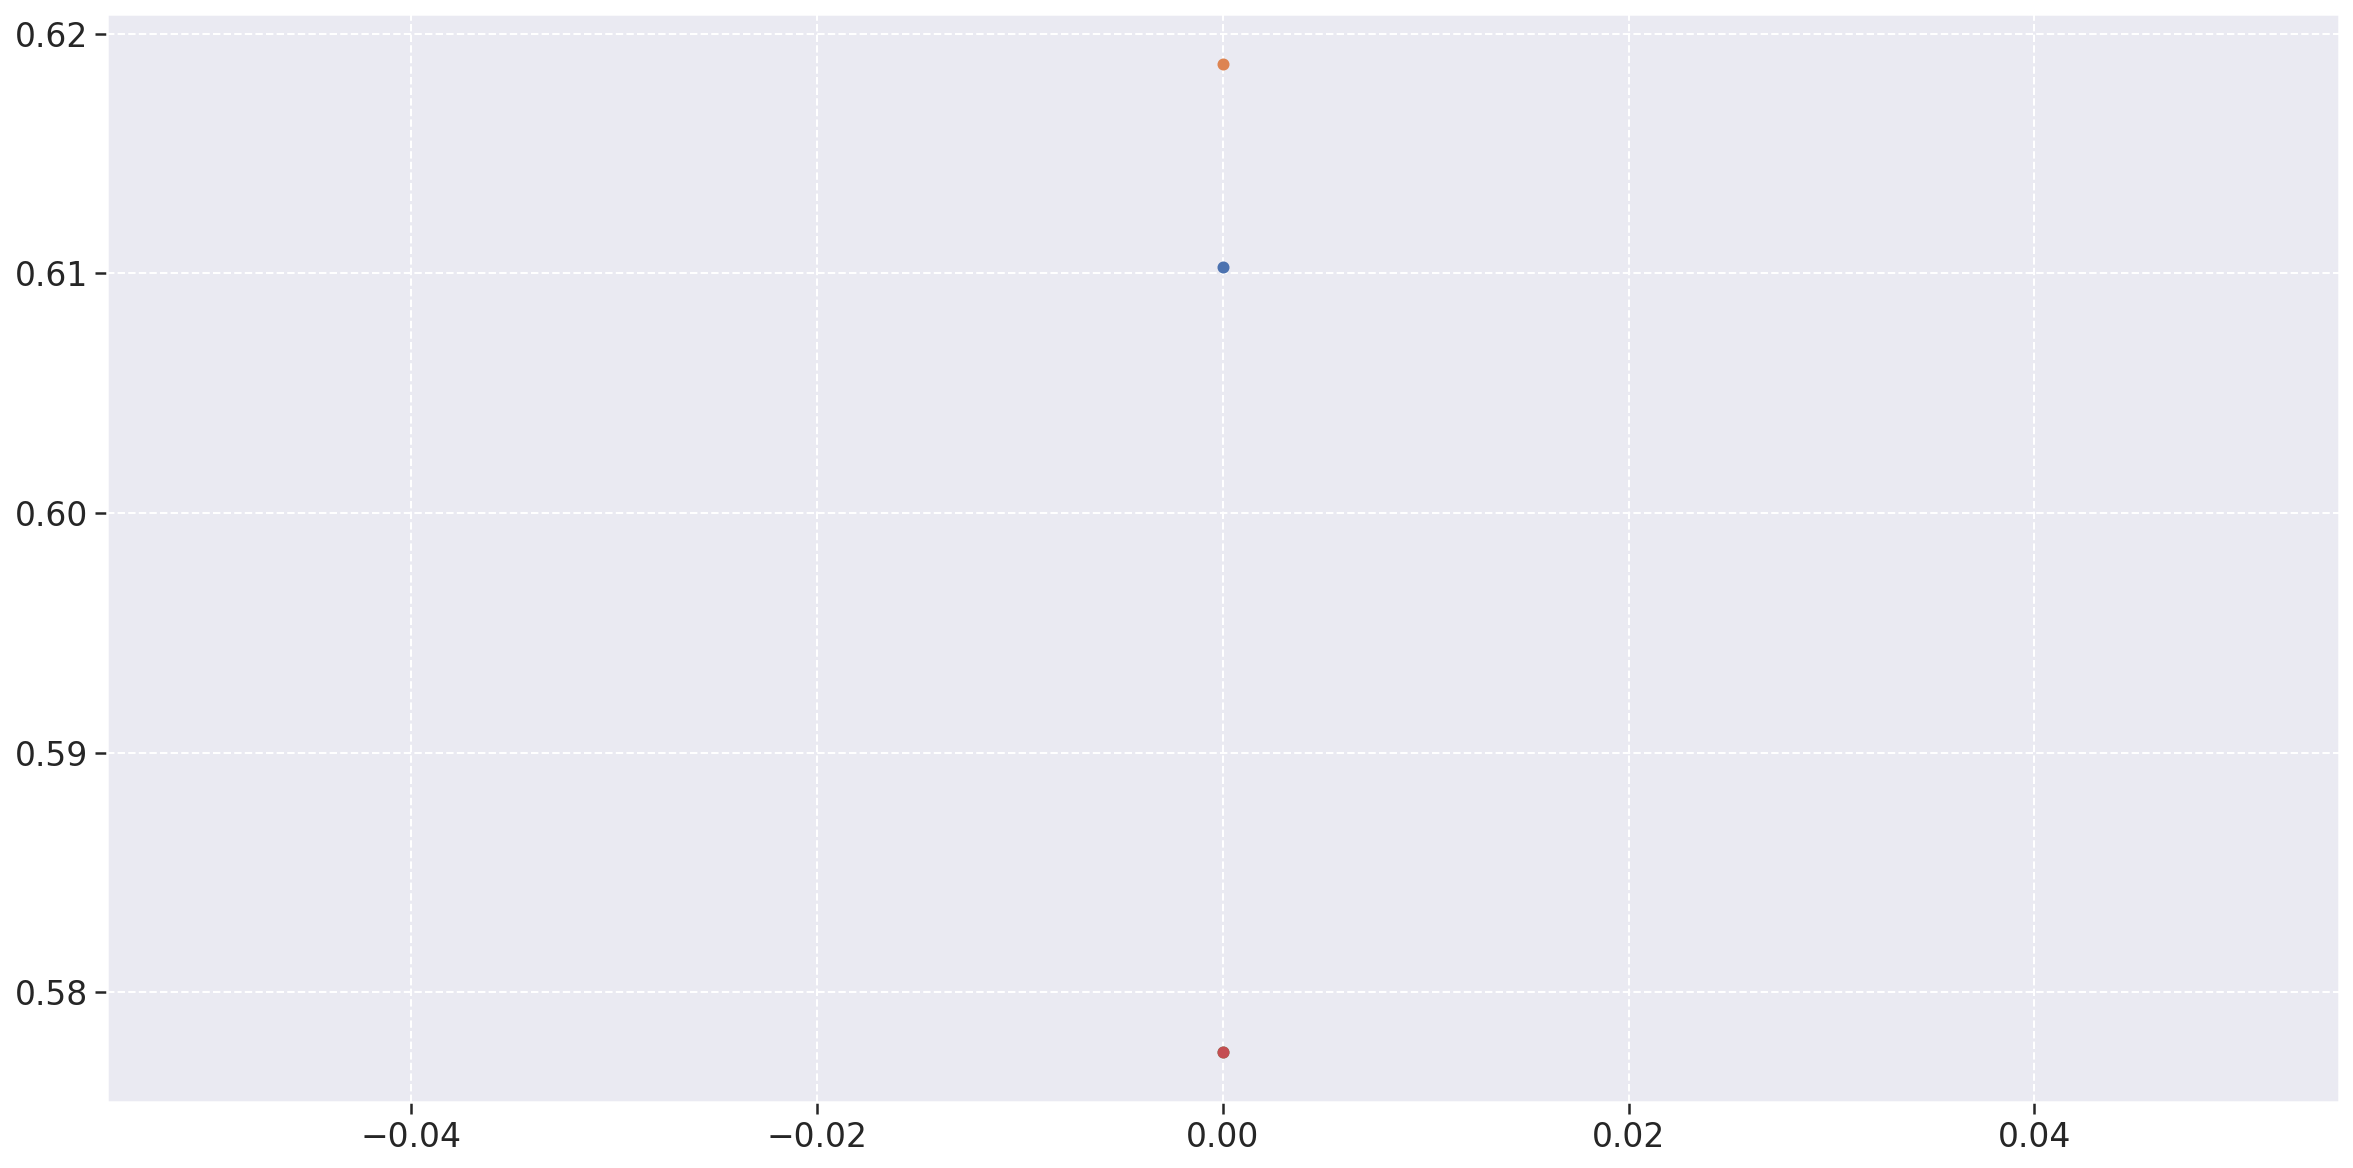

In [126]:
fig = plt.figure(figsize=(20, 10))


plt.plot(repo1_metrics['code_quality'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2_metrics['code_quality'], linewidth=3, marker='o', markersize=5)
plt.plot(repo3_metrics['code_quality'], linewidth=3, marker='o', markersize=5)
plt.plot(repo4_metrics['code_quality'], linewidth=3, marker='o', markersize=5)


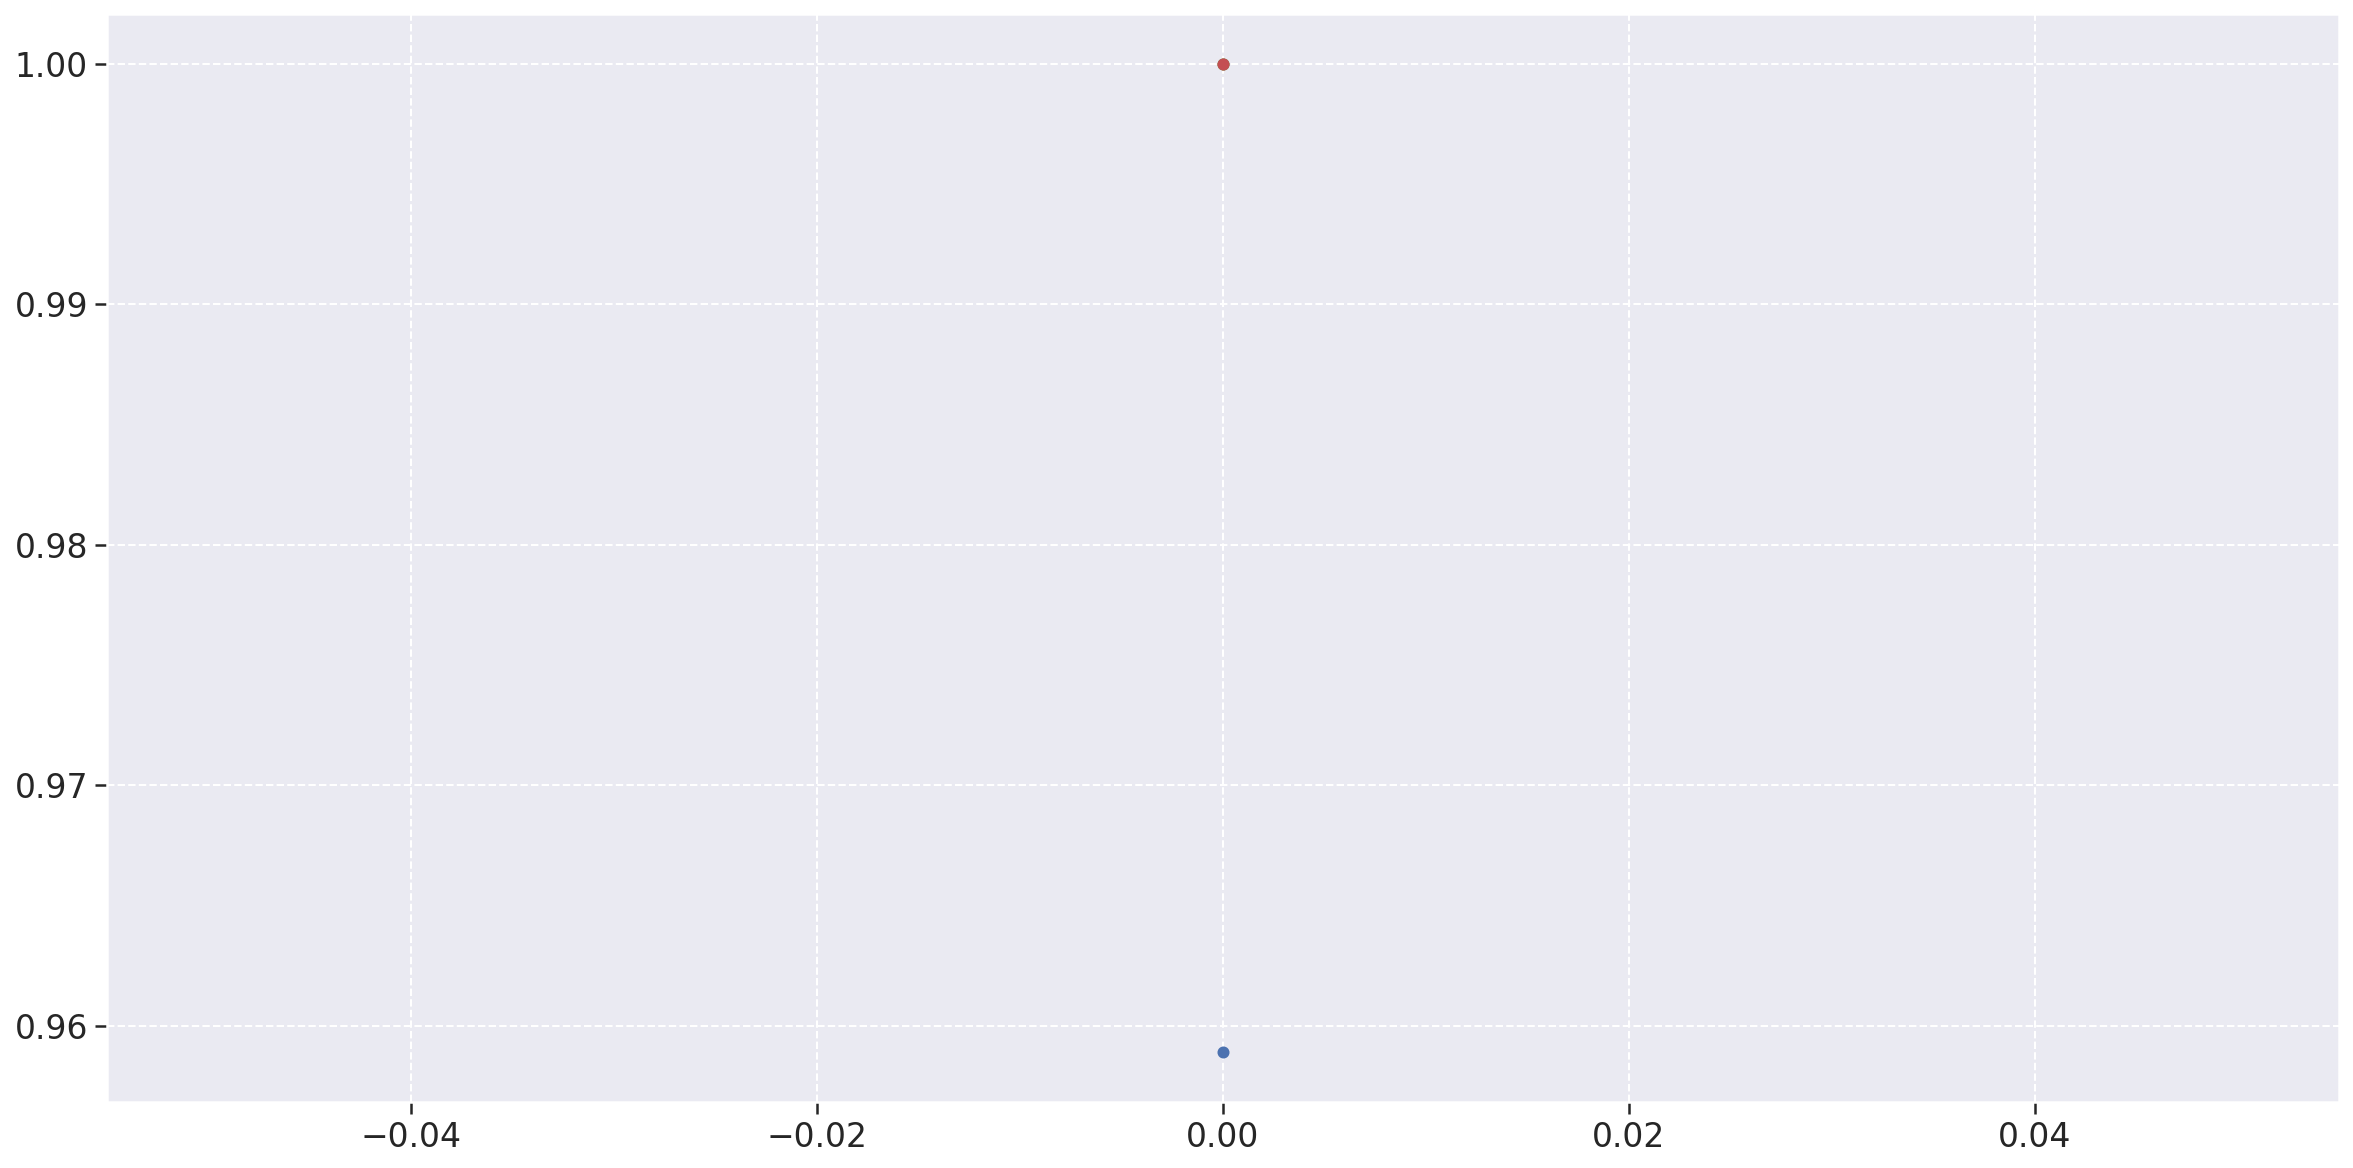

In [127]:
fig = plt.figure(figsize=(20, 10))


plt.plot(repo1_metrics['testing_status'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2_metrics['testing_status'], linewidth=3, marker='o', markersize=5)
plt.plot(repo3_metrics['testing_status'], linewidth=3, marker='o', markersize=5)
plt.plot(repo4_metrics['testing_status'], linewidth=3, marker='o', markersize=5)



In [129]:
metrics_df = pd.concat([repo1_metrics, repo2_metrics, repo3_metrics, repo4_metrics], ignore_index=True)

metrics_df['maintainability'] = metrics_df['code_quality'] * pc1
metrics_df['Reliability'] = metrics_df['testing_status'] * pc2
metrics_df['total'] = metrics_df['maintainability'] + metrics_df['Reliability']

In [130]:
metrics_df

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,maintainability,Reliability,total
0,0.863014,0.027397,0.958904,0.958904,0.958904,0.958904,UserInterface,10-21-2021-17-56,3796,0.610274,0.958904,0.305137,0.479452,0.784589
1,0.750000,0.125000,1.000000,1.000000,1.000000,1.000000,User,10-29-2021-14-47,211,0.618750,1.000000,0.309375,0.500000,0.809375
2,0.625000,0.125000,1.000000,1.000000,1.000000,1.000000,FishWiki,10-29-2021-15-07,342,0.577500,1.000000,0.288750,0.500000,0.788750
3,0.625000,0.125000,1.000000,1.000000,1.000000,1.000000,FishLog,10-28-2021-23-52,382,0.577500,1.000000,0.288750,0.500000,0.788750


(0.45, 0.7)

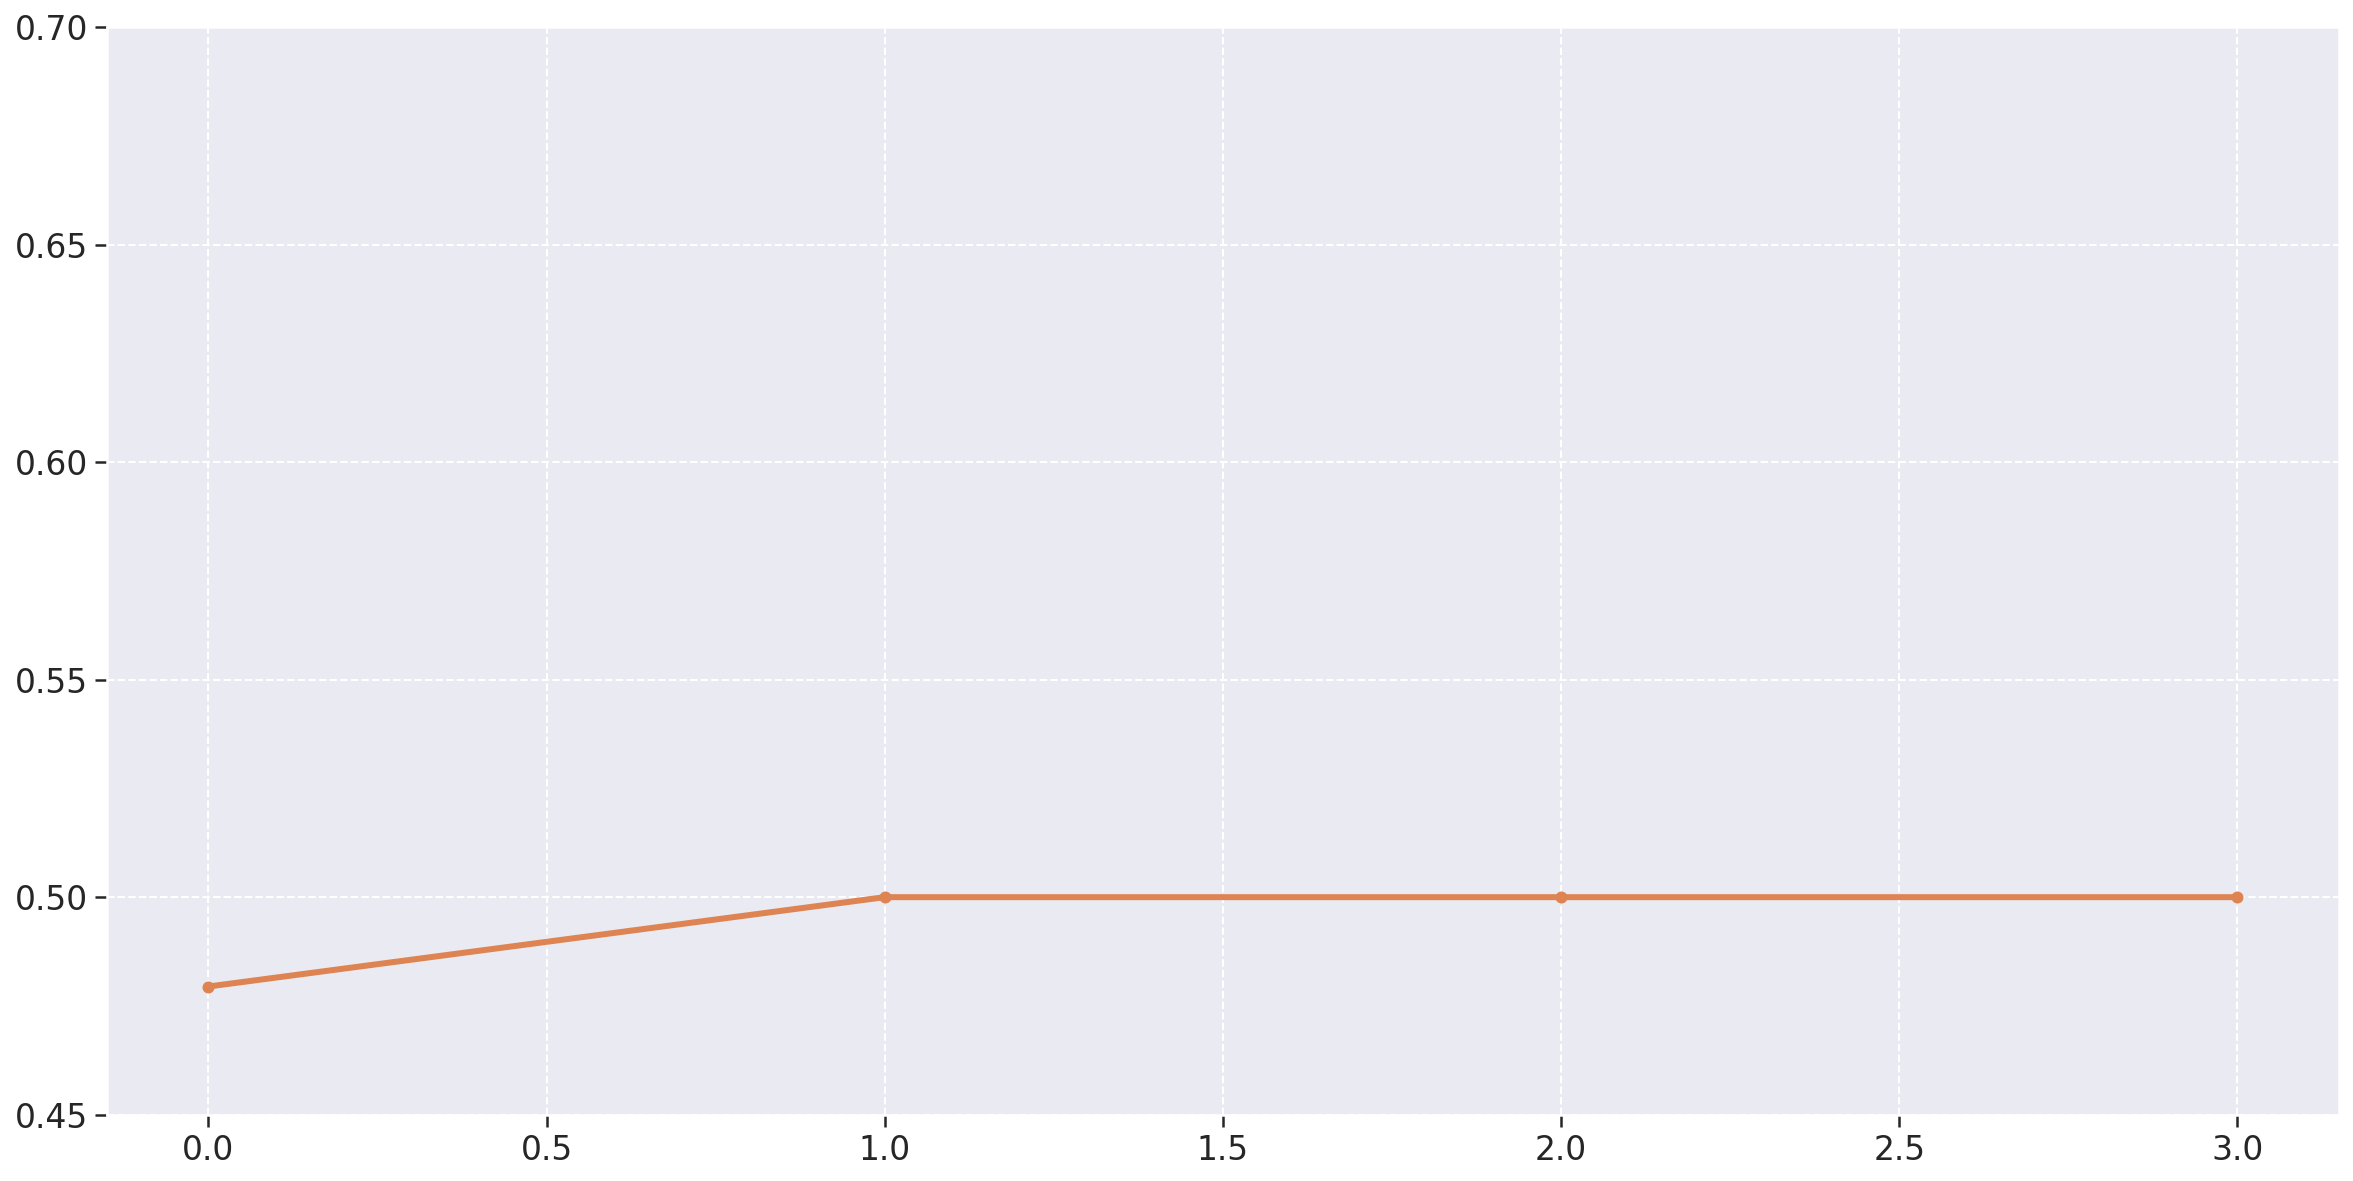

In [131]:
fig = plt.figure(figsize=(20, 10))


plt.plot(metrics_df['maintainability'], linewidth=3, marker='o', markersize=5)
plt.plot(metrics_df['Reliability'], linewidth=3, marker='o', markersize=5)


plt.ylim(.45,.7)

0    0.784589
1    0.809375
2    0.788750
3    0.788750
Name: total, dtype: float64


(0.45, 0.9)

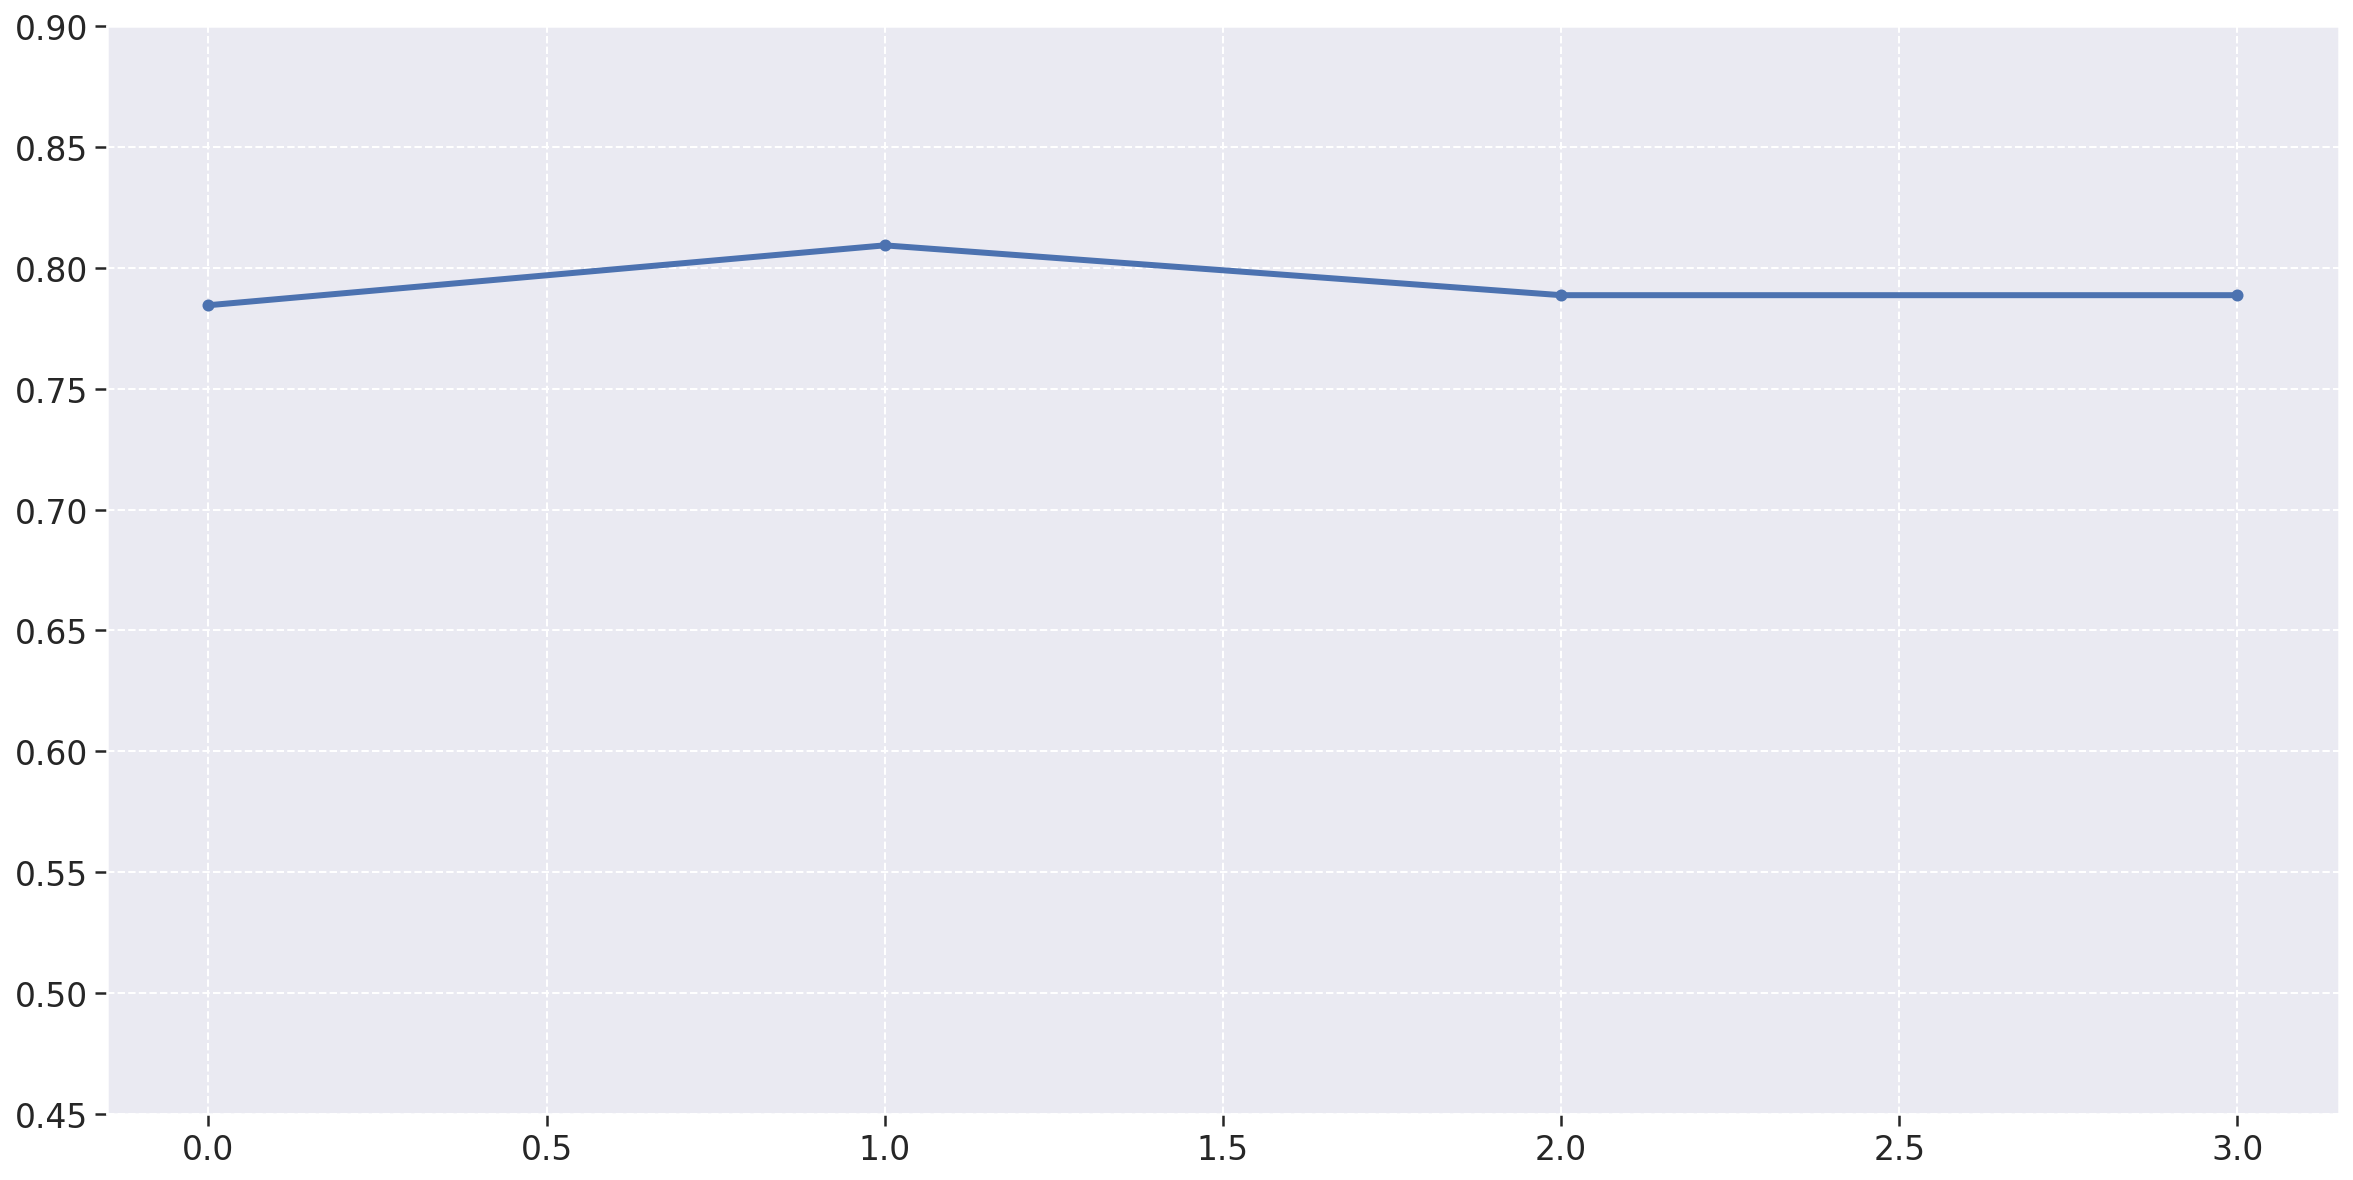

In [136]:
fig = plt.figure(figsize=(20, 10))

print(metrics_df['total'])
plt.plot(metrics_df['total'], linewidth=3, marker='o', markersize=5)


plt.ylim(.45,.9)


In [139]:
# ANALYSIS_DATE FORMAT: YYYY-MM-DD
currentTime = datetime.datetime.now().strftime("%Y-%m-%d")

# metrics_df.to_excel('data/fga-eps-mds-Pro-Especies-DATASET-{}.xlsx'.format(currentTime), index = False)
metrics_df.to_csv('data/fga-eps-mds-Pro-Especies-DATASET-{}.csv'.format(currentTime), index = False)